Importing the necessary libraries.



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns',None) 

Uploading the dataset

In [3]:
train_data = df = pd.read_excel('training data.xlsx')
test_data = df = pd.read_excel('testing data.xlsx')

In [4]:
train_data[train_data.Airline == 'Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [5]:
test_data[test_data.Airline == 'Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2671,Trujet,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


# Featuring the training data set


In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# Removing the unnecessary columns from the training set.

In [9]:
train_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [10]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [12]:
# The info method shows the insights about the data.

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [14]:
#There is 1 row with null values so we will drop that value.
#Dropping all the null values if present.
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [16]:
# Looking ate the unique values of Categorical Features

print("                                                                                 ")
print("---------------------------------------------------------------------------------")
print("                                                                                 ")
print(train_data['Airline'].unique())
print("                                                                                 ")
print("---------------------------------------------------------------------------------")
print("                                                                                 ")
print(train_data['Destination'].unique())
print("                                                                                 ")
print("---------------------------------------------------------------------------------")
print("                                                                                 ")
print(train_data['Source'].unique())

                                                                                 
---------------------------------------------------------------------------------
                                                                                 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
                                                                                 
---------------------------------------------------------------------------------
                                                                                 
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
                                                                                 
---------------------------------------------------------------------------------
                                                                                 
['Ban

In [17]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [18]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

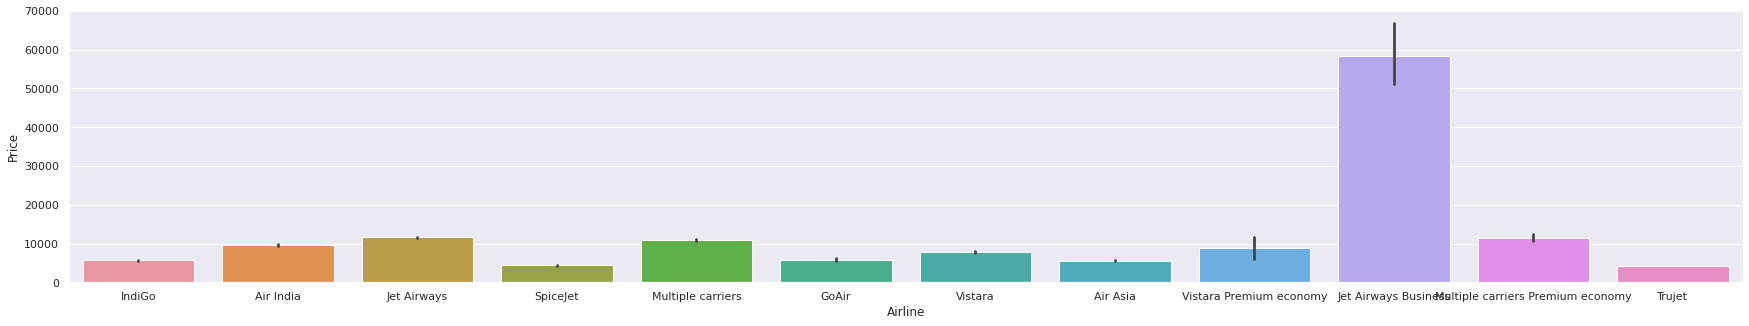

In [20]:
# Visualizing the data.

plt.figure(figsize=(30,5))
sns.barplot(x="Airline",y="Price",data=train_data)

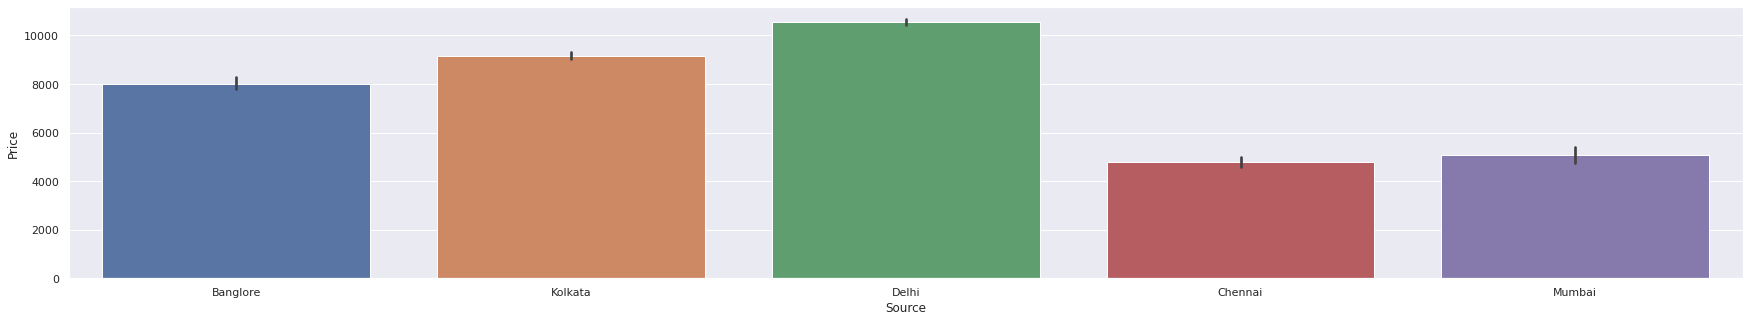

In [21]:
plt.figure(figsize=(30,5))
sns.barplot(x="Source",y="Price",data=train_data)

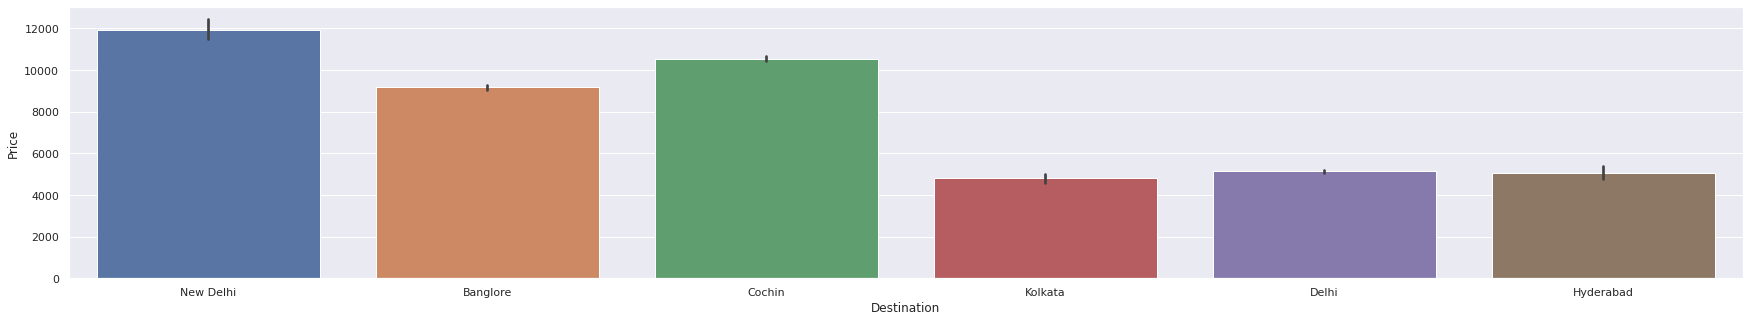

In [22]:
plt.figure(figsize=(30,5))
sns.barplot(x="Destination",y="Price",data=train_data)

In [23]:
# Converting the categorial data for the 'Total_Stops' column.
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [24]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [25]:
# Function to convert the various columns and creating new ones.
def conversion_function(dataframe):
  
  # extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day'
  dataframe['Journey_month'] = pd.to_datetime(dataframe["Date_of_Journey"], format="%d/%m/%Y").dt.month
  dataframe['Journey_day'] = pd.to_datetime(dataframe["Date_of_Journey"], format="%d/%m/%Y").dt.day

  # Extracting Hours from 'Dep_Time' column by creating a new column 'Dep_hour'
  dataframe["Dep_hour"] = pd.to_datetime(dataframe['Dep_Time']).dt.hour

  # Extracting Minutes from 'Dep_Time' column by creating a new column 'Dep_min'
  dataframe["Dep_min"] = pd.to_datetime(dataframe['Dep_Time']).dt.minute

  # Extracting Hours from 'Arrival_Time' column by creating a new column 'Arr_hour'
  dataframe["Arr_hour"] = pd.to_datetime(dataframe['Arrival_Time']).dt.hour

  # Extracting Minutes from 'Arrival_Time' column by creating a new column 'Arr_min'
  dataframe["Arr_min"] = pd.to_datetime(dataframe['Arrival_Time']).dt.minute


  dataframe.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time"], axis=1, inplace=True)

In [26]:
# Function to convert the duration column to duration in hours and minutes.
def duration_conversion(dataframe):
  duration = list(dataframe["Duration"])
  for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
      if "h" in duration[i]:
          duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
      else:
          duration[i] = "0h " + duration[i]           # Adds 0 hour
  duration_hours = []
  duration_mins = []
  for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
  dataframe.drop(['Duration'], axis=1, inplace=True)
  return duration_hours, duration_mins

In [27]:
# Function to convert the categorial data.

def convert_categorial(dataframe):

  # As Airline column has nominal Categorical data , we will perform One Hot encoding
  Airline = dataframe[["Airline"]]
  #By using the drop_first paramater, it will drop the first column it created to avoid the dummy variable trap.
  Airline = pd.get_dummies(Airline, drop_first=True)


  # as Source column has  nominal categorical data, we will perform OneHotEncoding
  Source = dataframe[["Source"]]
  #By using the drop_first paramater, it will drop the first column it created to avoid the dummy variable trap.
  Source = pd.get_dummies(Source, drop_first=True)


  # as Destination column has  nominal categorical data, we will perform OneHotEncoding
  Destination = dataframe[["Destination"]]
  #By using the drop_first paramater, it will drop the first column it created to avoid the dummy variable trap.
  Destination = pd.get_dummies(Destination, drop_first=True)

  dataframe.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

  return Airline, Source, Destination

In [28]:
conversion_function(train_data)
train_data['Duration_hours'], train_data['Duration_mins'] = duration_conversion(train_data)
Airline, Source, Destination = convert_categorial(train_data)

In [29]:
# Storing all the converion to a new data set.
data_train = pd.concat([train_data, Airline, Source, Destination],axis=1)
data_train.head()

,Total_Stops,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
# Featuring the test data.

In [31]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2672 non-null   object
 1   Date_of_Journey  2672 non-null   object
 2   Source           2672 non-null   object
 3   Destination      2672 non-null   object
 4   Route            2672 non-null   object
 5   Dep_Time         2672 non-null   object
 6   Arrival_Time     2672 non-null   object
 7   Duration         2672 non-null   object
 8   Total_Stops      2672 non-null   object
 9   Additional_Info  2672 non-null   object
dtypes: object(10)
memory usage: 208.9+ KB


In [33]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [34]:
conversion_function(test_data)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


In [35]:
test_data['Duration_hours'], test_data['Duration_mins'] = duration_conversion(test_data)

In [36]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50


In [37]:
Airline, Source, Destination = convert_categorial(test_data)
data_test = pd.concat([test_data, Airline, Source, Destination],axis=1)
data_test.head()

,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
# Converting the categorial data for the 'Total_Stops' column.
data_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data_test.head()

,Route,Total_Stops,Additional_Info,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,No info,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1,In-flight meal not included,5,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1,No info,5,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,0,No info,6,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
data_test.drop(["Route", "Additional_Info"],axis=1,inplace=True)
data_test.head()

,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
data_train.shape

(10682, 30)

In [41]:
data_test.shape

(2672, 29)

In [42]:
X = data_train.drop(['Price'], axis=1)
print(X.shape)
X.head()

(10682, 29)


,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

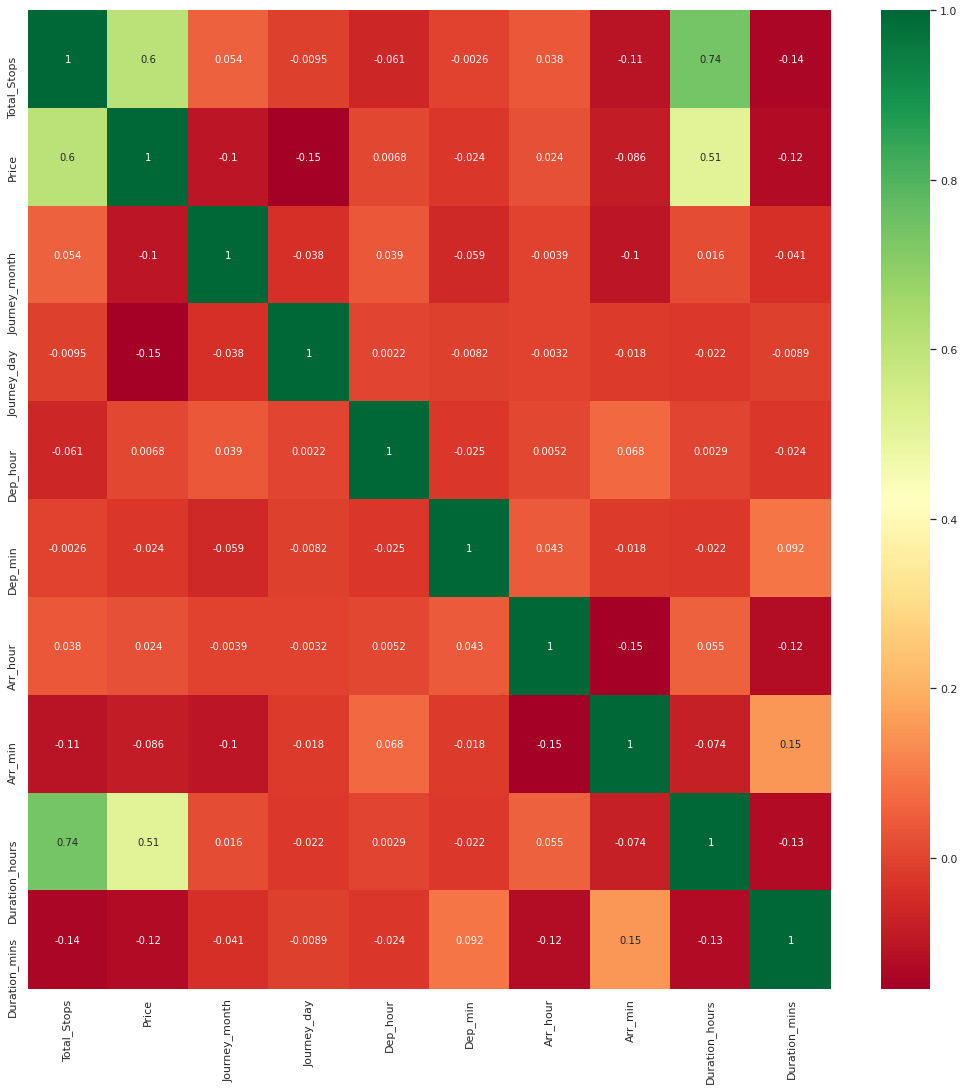

In [44]:
# Finding correlation betwwen Independent and Dependent Feature

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8545, 29)
(8545,)
(2137, 29)
(2137,)


In [47]:
def percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

#Ridge Regression

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [49]:
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error ,r2_score
from math import sqrt
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  2822.4183333202163
Mean Absolute % Error:  24
R-Squared:  0.6240579311908495


In [50]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  2863.8433359946134
Mean Absolute % Error:  24
R-Squared:  0.6196281778593494


In [117]:
model_scores = []
from sklearn.metrics import mean_squared_error , r2_score

#Random Forest Regressor


In [118]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
# prediction variable 'y_pred'
y_pred= reg_rf.predict(X_test)
y_pred

array([16869.33  ,  5312.33  ,  8956.05  , ...,  6578.35  , 12921.3075,
       13010.835 ])

In [120]:
# Accuracy to training sets
reg_rf.score(X_train, y_train)

0.9536021864907682

In [121]:
 # accuracy of Testing sets
reg_rf.score(X_test, y_test)

0.7958622820412331

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


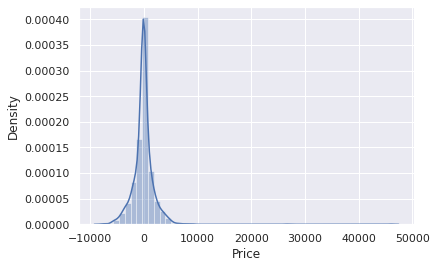

In [122]:
sns.distplot(y_test-y_pred)
plt.show()

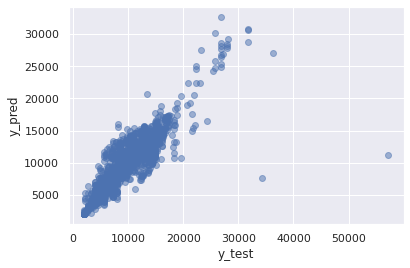

In [123]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [124]:
model_scores.append({'Random Forest Regressor': [{'training_score': reg_rf.score(X_train, y_train),
                                                  'testing_score': reg_rf.score(X_test, y_test),
                                                  "R-Squared: ": r2_score(y_test, y_pred),
                                                  "Mean Absolute % Error: ": round(percentage_error(y_test, y_pred)),
                                                  "Root Mean Squared Error: ": sqrt(mean_squared_error(y_test, y_pred)),
                                                        }]})

In [125]:
model_scores[0]['Random Forest Regressor'][0]

{'Mean Absolute % Error: ': 13,
 'R-Squared: ': 0.7958622820412331,
 'Root Mean Squared Error: ': 2098.0059514960353,
 'testing_score': 0.7958622820412331,
 'training_score': 0.9536021864907682}

#Decision Tree Regressor

In [126]:
from sklearn.tree import DecisionTreeRegressor
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [127]:
# prediction variable 'y_pred'
y_pred= tree.predict(X_test)
y_pred

array([16840.        ,  5747.19230769,  8690.        , ...,
        6249.66666667, 12537.04      , 12641.203125  ])

In [128]:
# Accuracy to training sets
tree.score(X_train, y_train)

0.9013240385190084

In [129]:
# accuracy of Testing sets
tree.score(X_test, y_test)

0.7870982579953322

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


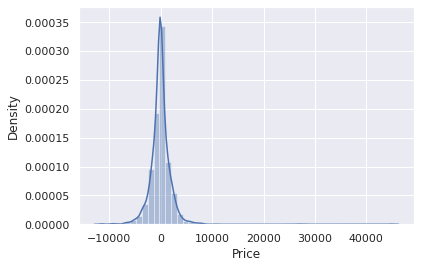

In [130]:
sns.distplot(y_test-y_pred)
plt.show()

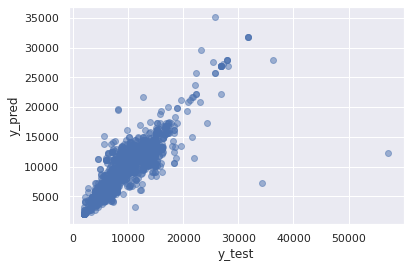

In [131]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [132]:
model_scores.append({'Decision Tree Regressor': [{'training_score': tree.score(X_train, y_train),
                                                  'testing_score': tree.score(X_test, y_test),
                                                  "R-Squared: ": r2_score(y_test, y_pred),
                                                  "Mean Absolute % Error: ": round(percentage_error(y_test, y_pred)),
                                                  "Root Mean Squared Error: ": sqrt(mean_squared_error(y_test, y_pred)),
                                                        }]})

In [133]:
model_scores

[{'Random Forest Regressor': [{'Mean Absolute % Error: ': 13,
    'R-Squared: ': 0.7958622820412331,
    'Root Mean Squared Error: ': 2098.0059514960353,
    'testing_score': 0.7958622820412331,
    'training_score': 0.9536021864907682}]},
 {'Decision Tree Regressor': [{'Mean Absolute % Error: ': 14,
    'R-Squared: ': 0.7870982579953321,
    'Root Mean Squared Error: ': 2142.568400919049,
    'testing_score': 0.7870982579953322,
    'training_score': 0.9013240385190084}]}]

#Lasso Regression

In [135]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [137]:
y_pred = lasso_regressor.predict(X_test)
y_pred

array([13333.99321628,  7651.61478306,  9577.16160759, ...,
        6989.22735638, 11224.63708456, 11569.55903989])

In [138]:
# Accuracy to training sets
lasso_regressor.score(X_train, y_train)

-1946.5816768911504

In [139]:
# accuracy of Testing sets
lasso_regressor.score(X_test, y_test)

-1974.1052610341897

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


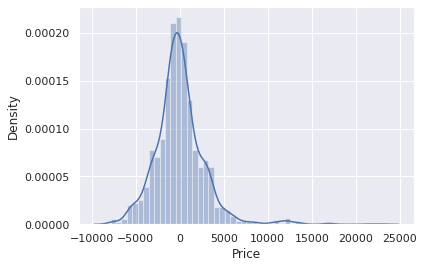

In [140]:
sns.distplot(y_test-y_pred)
plt.show()

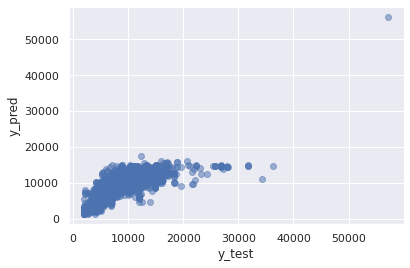

In [141]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [142]:
model_scores.append({'Lasso Regressor Regressor': [{'training_score': lasso_regressor.score(X_train, y_train),
                                                  'testing_score': lasso_regressor.score(X_test, y_test),
                                                  "R-Squared: ": r2_score(y_test, y_pred),
                                                  "Mean Absolute % Error: ": round(percentage_error(y_test, y_pred)),
                                                  "Root Mean Squared Error: ": sqrt(mean_squared_error(y_test, y_pred)),
                                                        }]})

In [143]:
model_scores

[{'Random Forest Regressor': [{'Mean Absolute % Error: ': 13,
    'R-Squared: ': 0.7958622820412331,
    'Root Mean Squared Error: ': 2098.0059514960353,
    'testing_score': 0.7958622820412331,
    'training_score': 0.9536021864907682}]},
 {'Decision Tree Regressor': [{'Mean Absolute % Error: ': 14,
    'R-Squared: ': 0.7870982579953321,
    'Root Mean Squared Error: ': 2142.568400919049,
    'testing_score': 0.7870982579953322,
    'training_score': 0.9013240385190084}]},
 {'Lasso Regressor Regressor': [{'Mean Absolute % Error: ': 24,
    'R-Squared: ': 0.619046761396499,
    'Root Mean Squared Error: ': 2866.031260757728,
    'testing_score': -1974.1052610341897,
    'training_score': -1946.5816768911504}]}]

#Hyperparameter Tuning

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
# Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [146]:
# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [148]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [149]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [150]:
# looking at best parameters
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [151]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20,)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
y_pred = rf.predict(X_test)
y_pred

array([16991.91592975,  5654.94790748,  8668.64689539, ...,
        6881.55827316, 12439.84659454, 12495.55117982])

In [154]:
# Accuracy to training sets
rf.score(X_train, y_train)

0.8957756978278176

In [155]:
#accuracy of Testing sets
rf.score(X_test, y_test)

0.8114370464699049

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


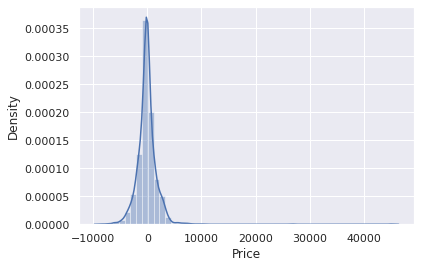

In [156]:
sns.distplot(y_test-y_pred)
plt.show()

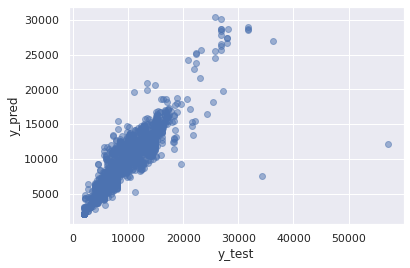

In [157]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [158]:
model_scores.append({'Hyperparmater tuned RandomForestRegressor': [{'training_score': rf.score(X_train, y_train),
                                                  'testing_score': rf.score(X_test, y_test),
                                                  "R-Squared: ": r2_score(y_test, y_pred),
                                                  "Mean Absolute % Error: ": round(percentage_error(y_test, y_pred)),
                                                  "Root Mean Squared Error: ": sqrt(mean_squared_error(y_test, y_pred)),
                                                        }]})

In [160]:
model_scores[3]

{'Hyperparmater tuned RandomForestRegressor': [{'Mean Absolute % Error: ': 13,
   'R-Squared: ': 0.8114370464699049,
   'Root Mean Squared Error: ': 2016.3841461056502,
   'testing_score': 0.8114370464699049,
   'training_score': 0.8957756978278176}]}

In [161]:
import pickle
filename = 'random_forest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [162]:
import joblib
# Save the model as a pickle in a file 
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [163]:
import os
os.listdir('.')

['.config',
 'random_forest_model.sav',
 'training data.xlsx',
 'testing data.xlsx',
 'random_forest_model.pkl',
 'sample_data']

In [166]:
!ls

 random_forest_model.pkl   sample_data	       'training data.xlsx'
 random_forest_model.sav  'testing data.xlsx'
